In [1]:
# import the packages i need and load the data from keras datasets
import os
import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# data normalization
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y


# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

print("The shape of x_train", x_train.shape)
print("The shape of y_train", y_train.shape)
print("The shape of x_test", x_test.shape)
print("The shape of y_test", y_test.shape)

Using TensorFlow backend.


The shape of x_train (50000, 3072)
The shape of y_train (50000, 10)
The shape of x_test (10000, 3072)
The shape of y_test (10000, 10)


In [2]:
# hyperparameters
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
DROPOUT = 0.1
MOMENTUM = 0.95

In [3]:
# model construction
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

Experiment with save_best_only = True
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
 - 22s - loss: 2.2565 - acc: 0.2608 - val_loss: 2.1394 - val_acc: 0.3209
Epoch 2/50
 - 11s - loss: 1.7432 - acc: 0.3950 - val_loss: 1.7954 - val_acc: 0.3839
Epoch 3/50
 - 11s - loss: 1.6196 - acc: 0.4343 - val_loss: 1.7038 - val_acc: 0.4092
Epoch 4/50
 - 10s - loss: 1.5490 - acc: 0.4578 - val_loss: 1.6442 - val_acc: 0.4194
Epoch 5/50
 - 10s - loss: 1.4965 - acc: 0.4773 - val_loss: 1.6066 - val_acc: 0.4354
Epoch 6/50
 - 10s - loss: 1.4505 - acc: 0.4935 - val_loss: 1.5820 - val_acc: 0.4409
Epoch 7/50
 - 10s - loss: 1.4090 - acc: 0.5096 - val_loss: 1.5565 - val_acc: 0.4455
Epoch 8/50
 - 10s - loss: 1.3737 - acc: 0.5206 - val_loss: 1.5431 - val_acc: 0.4537
Epoch 9/50
 - 11s - loss: 1.3408 - acc: 0.5323 - val_loss: 1.5294 - val_acc: 0.4603
Epoch 10/50
 - 10s - loss: 1.3137 - 

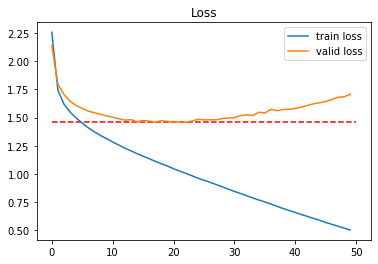

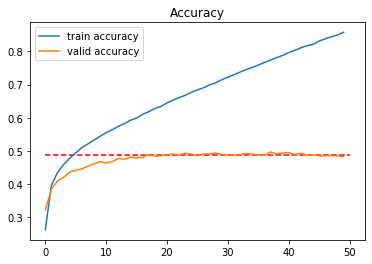

Experiment with save_best_only = False
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
 - 14s - loss: 2.2438 - acc: 0.2718 - val_loss: 2.0937 - val_acc: 0.3117
Epoch 2/50
 - 12s - loss: 1.7454 - acc: 0.3937 - val_loss: 1.8308 - val_acc: 0.3713
Epoch 3/50
 - 11s - loss: 1.6189 - acc: 0.4333 - val_loss: 1.6921 - val_acc: 0.4124
Epoch 4/50
 - 10s - loss: 1.5464 - acc: 0.4591 - val_loss: 1.6374 - val_acc: 0.4348
Epoch 5/50
 - 12s - loss: 1.4910 - acc: 0.4802 - val_loss: 1.6049 - val_acc: 0.4397
Epoch 6/50
 - 11s - loss: 1.4459 - acc: 0.4958 - val_loss: 1.5668 - val_acc: 0.4523
Epoch 7/50
 - 10s - loss: 1.4067 - acc: 0.5068 - val_loss: 1.5465 - val_acc: 0.4653
Epoch 8/50
 - 10s - loss: 1.3718 - acc: 0.5232 - val_loss: 1.5263 - val_acc: 0.4664
Epoch 9/50
 - 11s - loss: 1.3399 - acc: 0.5313 - val_loss: 1.5086 - val_acc: 0.4770
Epoch 10/50
 - 12s - loss: 1.3090 - acc: 0.5441 - val_loss: 1.5162 - val_acc: 0.4739
Epoch 11/50
 - 14s - loss: 1.2806 - acc: 0.5548 - val_loss: 1.4959 - v

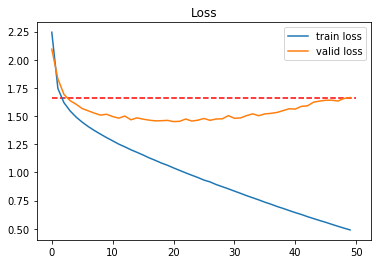

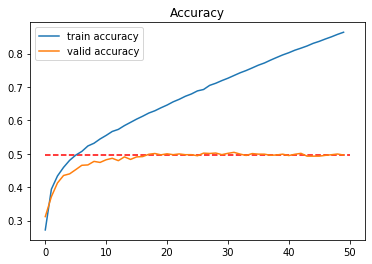

In [4]:
# using SGD as optimizer for training and see how the "save_best_only" influence the testing results

savemodel = [True, False]
results = {} # for plotting later
for save in savemodel:
  
    from keras.callbacks import ModelCheckpoint

    model_ckpt = ModelCheckpoint(filepath="./tmp_save_best_only_%s.h5"% str(save), 
                             monitor="val_loss", 
                             save_best_only=save)
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with save_best_only = %.6s" % str(save))
    model = build_mlp(input_shape=x_train.shape[1:])
    # model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks = [model_ckpt],
              verbose=2)
    
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-save_best_only_%s" % str(save)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    # Load back
    model = keras.models.load_model("./tmp_save_best_only_%s.h5"% str(save))
    loss_loadback, acc_loadback = model.evaluate(x_test, y_test)
    
    import matplotlib.pyplot as plt
    %matplotlib inline

    plt.plot(range(len(train_loss)), train_loss, label="train loss")
    plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
    plt.hlines(y=loss_loadback, xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
    plt.legend()
    plt.title("Loss")
    plt.show()

    plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
    plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
    plt.hlines(y=acc_loadback, xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
    plt.legend()
    plt.title("Accuracy")
    plt.show()

In [5]:
# setting the 'Save_weight_only' == true
from keras.callbacks import ModelCheckpoint

model_ckpt = ModelCheckpoint(filepath="./tmp_weight_only.h5", 
                             monitor="val_loss", 
                             save_best_only = True,
                            save_weights_only = True)
model = build_mlp(input_shape=x_train.shape[1:])
# model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[model_ckpt]
         )

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 14s 273us/step - loss: 2.2047 - acc: 0.2677 - val_loss: 2.0692 - val_acc: 0.3288
Epoch 2/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.7451 - acc: 0.3917 - val_loss: 1.8069 - val_acc: 0.3854
Epoch 3/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.6203 - acc: 0.4313 - val_loss: 1.6864 - val_acc: 0.4147
Epoch 4/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.5479 - acc: 0.4564 - val_loss: 1.6412 - val_acc: 0.4248
Epoch 5/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.4938 - acc: 0.4765 - val_loss: 1.5897 - val_acc: 0.4466
Epoch 6/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.4505 - acc: 0.4903 - val_loss: 1.5656 - val_acc: 0.4469
Epoch 7/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.4115 - acc: 0.5043 - val_loss: 1.

10000/10000 [==============================] - 2s 152us/step


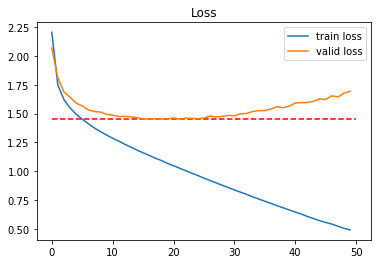

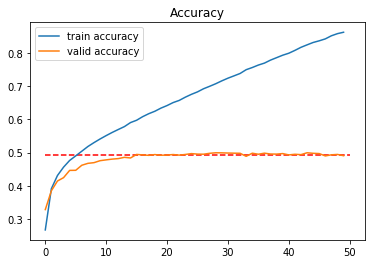

In [6]:
# load the weights and re-construct the model and have it compiled for testing
keras.backend.clear_session() # 把舊的 Graph 清掉
model = build_mlp(input_shape=x_train.shape[1:])
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
model.load_weights("./tmp_weight_only.h5")
loss_loadback, acc_loadback = model.evaluate(x_test, y_test)

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.hlines(y=loss_loadback, xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.hlines(y=acc_loadback, xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
plt.legend()
plt.title("Accuracy")
plt.show()